# Conexão com postgres e Relatorios do Sistema

## Instalando biblioteca de acesso com postgres e manipulação de dados e gráficos

In [1]:
!pip install --user psycopg2-binary
!pip install --user seaborn
!pip install --user pandas

    100% |████████████████████████████████| 2.7MB 3.3MB/s ta 0:00:011   41% |█████████████▍                  | 1.1MB 4.7MB/s eta 0:00:01
You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 215kB 4.5MB/s ta 0:00:01
    100% |████████████████████████████████| 12.9MB 1.8MB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/a8/0b/f163da98d3a01b3e0ef1cab8dd2123c34aee2bafbb1c5bffa354cc8a1730/scipy-1.1.0-cp36-cp36m-manylinux1_x86_64.whl
    100% |████████████████████████████████| 8.9MB 252kB/s ta 0:00:011
    100% |████████████████████████████████| 952kB 4.3MB/s ta 0:00:01
    100% |████████████████████████████████| 61kB 10.9MB/s ta 0:00:01
You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 18.0, however version 18.1 is available

### Importando bibliotecas

In [4]:
import seaborn as sns
import pandas as pd
import psycopg2

### Usando psycopg2 para configurar conexão

In [3]:
conn = psycopg2.connect(host="localhost",database="CtrlMoney", user="postgres", password="serra")

## Obtendo dados do database com Pandas

# Relatório 1

### Objetivo: Obter a quantidade de vezes que o valor de receitas recebidas no mês de Outubro de 2018 se repete dentro de uma faixa

Código para obtenção do resultado:

In [72]:
result = pd.read_sql_query(
"""SELECT range_valor,COUNT(*) as contador
FROM (
    SELECT   
           CASE WHEN receita.valor < 2000 THEN '< 2000'
                WHEN receita.valor BETWEEN 2000 AND 4000 THEN '2000-4000' 
                WHEN receita.valor BETWEEN 4000 AND 6000 THEN '4000-6000'
                WHEN receita.valor BETWEEN 6000 AND 8000 THEN '6000-8000'
                WHEN receita.valor > 8000 THEN '8000-10000'
           END AS range_valor
	
    FROM pessoa_usuario 
	INNER JOIN receita on (pessoa_usuario.id = receita.fk_pessoa_usuario)
	WHERE
	receita.data_recebimento > concat(2018,'-',05,'-',1)::date AND
	receita.data_recebimento < (date_trunc('month', concat(2018,'-',05,'-',1)::date) + interval '1 month' - interval '1 day')::date
	
) range_table
GROUP BY range_valor"""
,conn)

In [73]:
result

,range_valor,contador
0,< 2000,12126
1,2000-4000,12003
2,4000-6000,11915
3,6000-8000,11997
4,8000-10000,11223


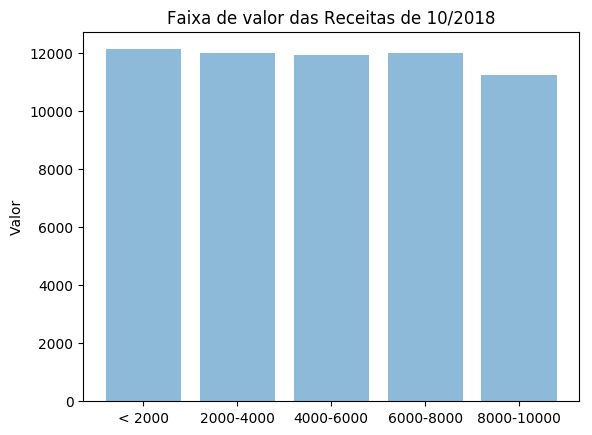

In [74]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame(result)

objects = tuple(df.range_valor)
y_pos = np.arange(len(objects))
performance = list(df.contador)

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Valor')
plt.title('Faixa de valor das Receitas de 10/2018')
 
plt.show()

# Relatorio2

### Objetivo: Obter a quantidade de vezes que o valor de despesas feitas no mês de Outubro de 2018 se repete dentro de uma faixa

codigo para obtenção do resultado:

In [68]:
result = pd.read_sql_query(
"""SELECT range_valor,COUNT(*) as contador
FROM (
    SELECT   
           CASE WHEN despesa.valor < 2000 THEN '< 2000'
                WHEN despesa.valor BETWEEN 2000 AND 4000 THEN '2000-4000' 
                WHEN despesa.valor BETWEEN 4000 AND 6000 THEN '4000-6000'
                WHEN despesa.valor BETWEEN 6000 AND 8000 THEN '6000-8000'
                WHEN despesa.valor > 8000 THEN '8000-10000'
           END AS range_valor
	
    FROM pessoa_usuario 
	INNER JOIN despesa on (pessoa_usuario.id = despesa.fk_pessoa_usuario)
	WHERE
	despesa.data_compra > concat(2018,'-',05,'-',1)::date AND
	despesa.data_compra < (date_trunc('month', concat(2018,'-',05,'-',1)::date) + interval '1 month' - interval '1 day')::date
	
) range_table
GROUP BY range_valor"""
,conn)

In [69]:
result


,range_valor,contador
0,< 2000,12103
1,2000-4000,12121
2,4000-6000,11781
3,6000-8000,12235
4,8000-10000,11711


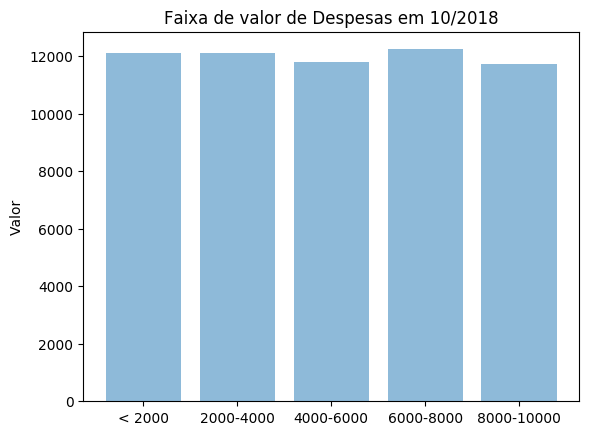

In [70]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame(result)

objects = tuple(df.range_valor)
y_pos = np.arange(len(objects))
performance = list(df.contador)

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Valor')
plt.title('Faixa de valor de Despesas em 10/2018')
 
plt.show()

## Relatório 3

### Objetivo: Obtenção de aumento de custo de 20% ao ano por funcionário

codigo para obtenção do resultado:

In [60]:
result = pd.read_sql_query(
"""SELECT range_idade, COUNT(*) as contador
FROM (
    SELECT   
           CASE WHEN extract(year from age(CURRENT_DATE, data_nasc)) BETWEEN 14 AND 17 THEN '14-17' 
                WHEN extract(year from age(CURRENT_DATE, data_nasc)) BETWEEN 18 AND 24 THEN '18-24' 
                WHEN extract(year from age(CURRENT_DATE, data_nasc)) BETWEEN 25 AND 30 THEN '25-30' 
                WHEN extract(year from age(CURRENT_DATE, data_nasc)) BETWEEN 31 AND 45 THEN '31-45' 
                WHEN extract(year from age(CURRENT_DATE, data_nasc)) BETWEEN 46 AND 60 THEN '46-60'
				WHEN extract(year from age(CURRENT_DATE, data_nasc)) BETWEEN 60 AND 80 THEN '60-80' 						   
           END AS range_idade
	
    FROM pessoa_usuario 
	
) range_table
GROUP BY range_idade
ORDER BY range_idade"""
,conn)

In [61]:
result

,range_idade,contador
0,14-17,25
1,18-24,1419
2,25-30,1249
3,31-45,3147
4,46-60,3134
5,60-80,1026


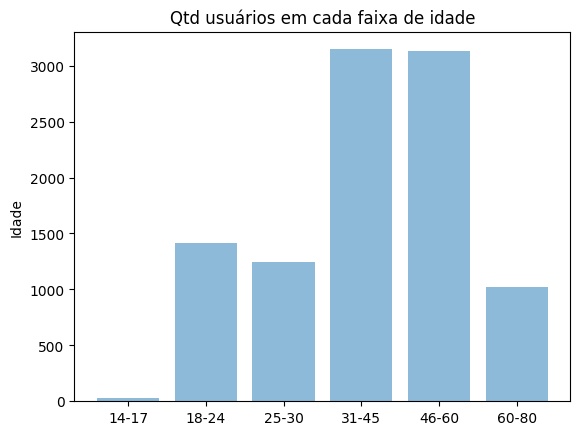

In [63]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame(result)

objects = tuple(df.range_idade)
y_pos = np.arange(len(objects))
performance = list(df.contador)

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Idade')
plt.title('Qtd usuários em cada faixa de idade')
 
plt.show()

## Relatório 4

### Objetivo: Obter top 10 dos produtos/serviços mais comprados no ano de 2018

codigo para obtenção do resultado:

In [98]:
result = pd.read_sql_query(
"""
SELECT nome as nome, COUNT(*) as qtd_vendas FROM despesa
WHERE
despesa.data_compra > concat(2018,'-',1,'-',1)::date AND
despesa.data_compra < (date_trunc('month', concat(2018,'-',12,'-',1)::date) + interval '1 month' - interval '1 day')::date
GROUP BY nome
ORDER BY COUNT(*) desc
LIMIT 10"""
,conn)

In [99]:
result

,nome,qtd_vendas
0,Small Copper Hat,172
1,Incredible Concrete Knife,171
2,Rustic Cotton Pants,168
3,Incredible Iron Gloves,167
4,Practical Plastic Watch,167
5,Gorgeous Paper Bag,166
6,Aerodynamic Leather Clock,166
7,Lightweight Iron Pants,166
8,Ergonomic Aluminum Knife,166
9,Intelligent Granite Pants,166


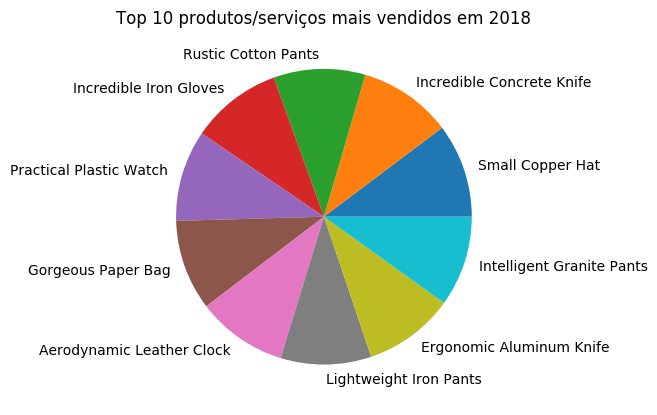

In [101]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame(result)

objects = tuple(df.nome)
y_pos = np.arange(len(objects))
performance = list(df.qtd_vendas)

plt.pie(performance, labels=objects)
plt.title('Top 10 produtos/serviços mais vendidos em 2018')
 
plt.show()

# Referencias

https://pandas.pydata.org/pandas-docs/stable/style.html <br>
https://pythonspot.com/matplotlib-bar-chart/<br>
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html <br>